###  Regresión y regresión

# Plan
* Pasar y extensión py
* Abrir en spider
* Acumular resultados
* Cargar en power bi
* Dormir

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
conGraficos=True

# Funciones

In [4]:
def hm_corr_graf(corr_matrix_V2, cat):
    aux=pd.pivot_table(corr_matrix_V2,columns=['variable_2'],index=['variable_1'],values=['r'])
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    sns.heatmap(
        aux,
        annot     = True,
        cbar      = False,
        annot_kws = {"size": 10},
        vmin      = -0.5,
        vmax      = 0.5,
        center    = 0,
        cmap      = sns.diverging_palette(20, 220, n=200),
        square    = True,
        ax        = ax
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation = 45,
        horizontalalignment = 'right',
    )
    ax.tick_params(labelsize = 10)
    ax.set_title(cat)

In [5]:
# para ver el grado de correlación entre las variables disponibles.
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

In [6]:
def dic_corr_ind(data):
    corr_matrix = data.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    #res_corr_total_var_nacional=corr_tab_bajas[corr_tab_bajas['variable_1'].isin(sel_variables_razones)]
    res_corr_total_raz_nacional=corr_tab_bajas[corr_tab_bajas['variable_1'].isin(sel_variables_causas2)]
    #res_corr_total_var_nacional.drop(columns=['abs_r'],inplace=True)
    res_corr_total_raz_nacional.drop(columns=['abs_r'],inplace=True)
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    
    res_corr_total_raz_nacional=res_corr_total_raz_nacional.sort_values('variable_1')
    
    #return res_corr_total_raz_nacional, res_corr_total_var_nacional, corr_tab_razones
    return res_corr_total_raz_nacional

In [7]:
def dic_corr_mes_ind(data):
    #res_corr_total_var=res_corr_total_var_nacional
    res_corr_total_raz=res_corr_total_raz_nacional
    dic_resultados={}
    
    for i in range(1,12):
        print(i)
        dic_aux={}
        data_aux=data[data['FECHA']==i]    
        corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
        corr_tab=tidy_corr_matrix(corr_matrix)
        corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
        #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]    
        dic_aux['total']=corr_tab_bajas    
        #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
        #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
        #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
        #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
        #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]    
        #dic_aux['razones']=corr_tab_razones
        dic_resultados[i]=dic_aux

    for i in range(1,12):
        print(i)
        #aux_tab_var=dic_resultados[i]['total'][dic_resultados[i]['total']['variable_1'].isin(sel_variables_razones)]
        aux_tab_sel=dic_resultados[i]['total'][dic_resultados[i]['total']['variable_1'].isin(sel_variables_causas2)]
        #aux_tab_var.drop(columns=['abs_r'],inplace=True)
        aux_tab_sel.drop(columns=['abs_r'],inplace=True)
        #aux_tab_var.columns=['variable_1',str(i)+'_r']
        ###aux_tab_sel.columns=['variable_1',str(i)+'_r']    
        aux_tab_sel.columns=['variable_1',i]
        #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
        res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')
    
    res_corr_total_raz_T=res_corr_total_raz.T
    res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
    res_corr_total_raz_T = res_corr_total_raz_T.iloc[2:]   
    
    #res_corr_total_var_T=res_corr_total_var.T
    #res_corr_total_var_T.columns = res_corr_total_var_T.iloc[0]
    #res_corr_total_var_T = res_corr_total_var_T.iloc[1:]
    
    #return res_corr_total_raz_T, res_corr_total_var_T
    return res_corr_total_raz_T

In [8]:
def iter_regresion_VIF(data_reg):    
    i=0
    flag=1
    variables_eliminar=['ind_churn','FECHA']
    y_train = data_reg['ind_churn']    
   
    while flag>0:
        i=i+1
        print(i)
        data_reg=data_reg.drop(columns=variables_eliminar)
        # Dividir en X y X       
        X_train =  data_reg
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()
        #lr_1.summary()
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        #vif
        df_coef=lr_1.params.to_frame()
        df_coef.columns=['coefs']
        df_p_values=lr_1.pvalues.to_frame()
        df_p_values.columns=['pvalues'] 
        
        df_revision=df_coef.merge(df_p_values, left_index=True, right_index=True)
        df_revision=df_revision.merge(vif, left_index=True, right_on=['Features'])
        print(df_revision)
        fila_problema=df_revision.sort_values(['pvalues'],ascending=False).head(1)
        print(fila_problema)
        if fila_problema['pvalues'].values[0]>0.05 :
            variables_eliminar=fila_problema['Features']
        else:
            fila_problema=df_revision.sort_values(['VIF'],ascending=False).head(1)
            if fila_problema['VIF'].values[0]>20 :
                variables_eliminar=fila_problema['Features']
            else:
                flag=0 
                
    return df_revision

In [9]:
def iter_regresion(data_reg):    
    i=0
    flag=1
    variables_eliminar=['ind_churn','FECHA']
    y_train = data_reg['ind_churn']    
   
    while flag>0:
        i=i+1
        print(i)
        data_reg=data_reg.drop(columns=variables_eliminar)
        # Dividir en X y X       
        X_train =  data_reg
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()
        #lr_1.summary()
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        #vif
        df_coef=lr_1.params.to_frame()
        df_coef.columns=['coefs']
        df_p_values=lr_1.pvalues.to_frame()
        df_p_values.columns=['pvalues'] 
        
        df_revision=df_coef.merge(df_p_values, left_index=True, right_index=True)
        df_revision=df_revision.merge(vif, left_index=True, right_on=['Features'])
        print(df_revision)
        fila_problema=df_revision.sort_values(['pvalues'],ascending=False).head(1)
        print(fila_problema)
        if fila_problema['pvalues'].values[0]>0.05 :
            variables_eliminar=fila_problema['Features']
        else:
            flag=0
            #fila_problema=df_revision.sort_values(['VIF'],ascending=False).head(1)
            #if fila_problema['VIF'].values[0]>20 :
            #    variables_eliminar=fila_problema['Features']
            #else:                 
                
    return df_revision

In [10]:
def dic_reg_mes_ind(data_reg):
    df_coef=df_coef_nal
    df_vif=df_vif_nal
    dic_resultados={}
    
    for i in range(1,12):
        dic_aux={}
        data_aux=data_reg[data_reg['FECHA']==i] 
        data_aux.drop(columns=['FECHA'],inplace=True)
        #data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
        
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]    
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados[i]=dic_aux
    
    for i in range(1,12):
        print(i)

        aux_tab_coef=dic_resultados[i]['coef']
        aux_tab_vif=dic_resultados[i]['vif']

        #aux_tab_coef.columns=[str(i)+'_coef']
        aux_tab_coef.columns=[i]
        #aux_tab_vif.columns=['Features',str(i)+'_vif']
        aux_tab_vif.columns=['Features',i]

        df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
        df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

    return df_coef, df_vif

# Carga Preprocesamiento

In [11]:
data_c0= pd.read_csv('NODOS_FILTRADOS_todos_ajuste_llamadas.csv',sep=';', header = 0)

In [12]:
data_c0.describe()

,MES,CANT_USER,BAJAS_1.TOTAL,BAJAS_2.CHURN_TEMPRANO,BAJAS_3.CHURN_7_24,BAJAS_4.VOL,BAJAS_5.INVOL,BAJAS_6.VOL_CHURN_TEMPRANO,BAJAS_7.INVOL_CHURN_TEMPRANO,BAJAS_8.VOL_CHURN_7_24,...,BAJAS_36.@_INVOL_CHURN_7_24,ALFA,ALFA_tarifa,BETA,Llamadas_3M,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
count,40920.000000,40920.000000,40920.000000,40920.000000,40920.000000,40920.000000,40920.000000,40920.000000,40920.000000,40920.000000,...,40920.000000,40854.000000,40460.000000,40900.000000,40920.000000,40920.000000,40920.000000,40873.000000,40905.000000,40920.000000
mean,6.000000,275.469599,0.081841,0.014648,0.026227,0.042387,0.039454,0.002448,0.012201,0.010788,...,0.005869,1.327170,0.959862,1.300539,2.084167,1.413268,0.607031,1.027683,0.492774,0.361464
std,3.162316,132.125541,0.046878,0.019649,0.025442,0.028768,0.038787,0.005711,0.018080,0.013734,...,0.007343,0.952965,0.189934,0.577798,0.522468,0.349927,0.233454,0.591396,0.146034,0.095480
min,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.415299,0.139640,0.810591,0.507692,0.085366,0.000000,0.000000,0.118538
25%,3.000000,179.000000,0.049451,0.000000,0.007692,0.023649,0.011050,0.000000,0.000000,0.000000,...,0.000000,0.621516,0.819878,0.916020,1.710430,1.161826,0.444721,0.574017,0.385401,0.292254
50%,6.000000,258.000000,0.073810,0.008621,0.020595,0.037736,0.029580,0.000000,0.004717,0.006780,...,0.003817,1.129837,0.945336,1.185031,2.020168,1.377182,0.559140,0.952348,0.490298,0.347161
75%,9.000000,348.000000,0.105820,0.021978,0.037916,0.055266,0.057143,0.000000,0.018519,0.017422,...,0.008889,1.803862,1.081372,1.539098,2.390311,1.625000,0.716814,1.399959,0.598192,0.414185
max,11.000000,1366.000000,0.714286,0.363636,0.305085,0.670996,0.433447,0.088235,0.363636,0.144231,...,0.101695,6.372842,1.514445,4.666667,4.284211,2.701754,1.700787,3.175737,0.879946,0.688474


In [13]:
data_c0.columns

Index(['MES', 'NODO', 'DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO',
       'CANT_USER', 'BAJAS_1.TOTAL', 'BAJAS_2.CHURN_TEMPRANO',
       'BAJAS_3.CHURN_7_24', 'BAJAS_4.VOL', 'BAJAS_5.INVOL',
       'BAJAS_6.VOL_CHURN_TEMPRANO', 'BAJAS_7.INVOL_CHURN_TEMPRANO',
       'BAJAS_8.VOL_CHURN_7_24', 'BAJAS_9.INVOL_CHURN_7_24', 'BAJAS_10.V',
       'BAJAS_11.V_CHURN_TEMPRANO', 'BAJAS_12.V_CHURN_7_24', 'BAJAS_13.V_VOL',
       'BAJAS_14.V_INVOL', 'BAJAS_15.V_VOL_CHURN_TEMPRANO',
       'BAJAS_16.V_INVOL_CHURN_TEMPRANO', 'BAJAS_17.V_VOL_CHURN_7_24',
       'BAJAS_18.V_INVOL_CHURN_7_24', 'BAJAS_19.T',
       'BAJAS_20.T_CHURN_TEMPRANO', 'BAJAS_21.T_CHURN_7_24', 'BAJAS_22.T_VOL',
       'BAJAS_23.T_INVOL', 'BAJAS_24.T_VOL_CHURN_TEMPRANO',
       'BAJAS_25.T_INVOL_CHURN_TEMPRANO', 'BAJAS_26.T_VOL_CHURN_7_24',
       'BAJAS_27.T_INVOL_CHURN_7_24', 'BAJAS_28.@',
       'BAJAS_29.@_CHURN_TEMPRANO', 'BAJAS_30.@_CHURN_7_24', 'BAJAS_31.@_VOL',
       'BAJAS_32.@_INVOL', 'BAJAS_33.@_VOL_CHURN_TEMPRANO

In [14]:
sel_variables_descrip=['MES','NODO','DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO','CANT_USER']
sel_variables_causas2=['ALFA_tarifa','ALFA', 'BETA', 'MEGA', 'Llamadas_Admin_3M', 'Llamadas_Tecn_3M','PENETRACION','OCUPACION_DW']
columns_bajas=list(data_c0.filter(regex=("BAJAS.*")).columns)

### Reemplazar nombre de columnas por compatibilidad

In [15]:
data_c0.rename(columns={'MES':'FECHA','NODO':'COD_NODO'}, inplace=True)

In [16]:
maestro_data=data_c0[['COD_NODO','DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO']].drop_duplicates()

## CORRELACIONES

###  Correlacion Bajas Totales

##  Funcion validar configuraciones Nacional

In [17]:
list(data_c0.columns)

['FECHA',
 'COD_NODO',
 'DIVISION',
 'AREA',
 'ZONA',
 'CIUDAD',
 'DISTRITO',
 'CANT_USER',
 'BAJAS_1.TOTAL',
 'BAJAS_2.CHURN_TEMPRANO',
 'BAJAS_3.CHURN_7_24',
 'BAJAS_4.VOL',
 'BAJAS_5.INVOL',
 'BAJAS_6.VOL_CHURN_TEMPRANO',
 'BAJAS_7.INVOL_CHURN_TEMPRANO',
 'BAJAS_8.VOL_CHURN_7_24',
 'BAJAS_9.INVOL_CHURN_7_24',
 'BAJAS_10.V',
 'BAJAS_11.V_CHURN_TEMPRANO',
 'BAJAS_12.V_CHURN_7_24',
 'BAJAS_13.V_VOL',
 'BAJAS_14.V_INVOL',
 'BAJAS_15.V_VOL_CHURN_TEMPRANO',
 'BAJAS_16.V_INVOL_CHURN_TEMPRANO',
 'BAJAS_17.V_VOL_CHURN_7_24',
 'BAJAS_18.V_INVOL_CHURN_7_24',
 'BAJAS_19.T',
 'BAJAS_20.T_CHURN_TEMPRANO',
 'BAJAS_21.T_CHURN_7_24',
 'BAJAS_22.T_VOL',
 'BAJAS_23.T_INVOL',
 'BAJAS_24.T_VOL_CHURN_TEMPRANO',
 'BAJAS_25.T_INVOL_CHURN_TEMPRANO',
 'BAJAS_26.T_VOL_CHURN_7_24',
 'BAJAS_27.T_INVOL_CHURN_7_24',
 'BAJAS_28.@',
 'BAJAS_29.@_CHURN_TEMPRANO',
 'BAJAS_30.@_CHURN_7_24',
 'BAJAS_31.@_VOL',
 'BAJAS_32.@_INVOL',
 'BAJAS_33.@_VOL_CHURN_TEMPRANO',
 'BAJAS_34.@_INVOL_CHURN_TEMPRANO',
 'BAJAS_35.@_VOL_CH

In [18]:
#data_c0['BAJAS_1.TOTAL'].sum()
data_c0['BAJAS_31.@_VOL'].sum()


654.8626827798103

In [19]:
data_c0['ind_churn']=data_c0['BAJAS_31.@_VOL']

In [20]:
data_c0['COD_NODO'].value_counts().min()

11

In [21]:
#Eliminar validación ==1
data_c0['val_ind']=np.where(data_c0['ind_churn']==0,1,0)

In [22]:
data_c0.groupby('COD_NODO')[['val_ind']].max().describe()

,val_ind
count,3720.000000
mean,0.337903
std,0.473059
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [23]:
data_c0['COD_NODO'].nunique()

3720

In [24]:
res_nodo=data_c0.groupby('COD_NODO')[['val_ind']].max()

In [25]:
res_nodo['val_ind'].value_counts()

0    2463
1    1257
Name: val_ind, dtype: int64

In [26]:
# TODA LA DATA
#data_c0=data_c0[data_c0['COD_NODO'].isin(res_nodo[res_nodo['val_ind']==0].index)]

In [27]:
data_c0['COD_NODO'].nunique()

3720

# Val Configuraciones

In [28]:
DataSetEntregable_totales=pd.DataFrame()

In [29]:
DataSetEntregable_totales_temp=pd.DataFrame()

In [30]:
res_corr_total_raz_nacional=dic_corr_ind(data_c0)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
res_corr_total_raz_nacional.rename(columns={'r':'NACIONAL'},inplace=True)

In [32]:
RV_nal_c0=dic_corr_ind(data_c0)

In [33]:
RV_nal_c0.rename(columns={'r':'NACIONAL'},inplace=True)

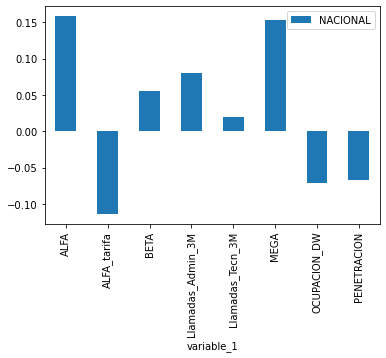

In [34]:
if conGraficos:
    RV_nal_c0.set_index('variable_1').plot.bar()

In [35]:
DataSetEntregable_totales=RV_nal_c0.copy()

In [36]:
DataSetEntregable_totales=DataSetEntregable_totales.set_index('variable_1').T

### Correlaciones x Periodo

### Funcion correlaciones por periodo
* Recibe los datos y retorna data framames para graficar

In [37]:
#(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_c0)
res_corr_total_raz_T=dic_corr_mes_ind(data_c0)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [38]:
res_corr_total_raz_T

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
1,0.182939,-0.145147,0.027591,0.136119,0.084383,0.19193,-0.081185,-0.007017
2,0.198935,-0.161004,0.062106,0.146656,0.068285,0.199929,-0.0808,-0.026581
3,0.187576,-0.160858,0.082516,0.118053,0.07069,0.174106,-0.07751,-0.050876
4,0.131669,-0.106616,0.040856,0.110994,0.04302,0.129073,-0.081508,-0.081422
5,0.160131,-0.075173,0.042542,0.116737,0.031457,0.16443,-0.063532,-0.095737
6,0.180503,-0.134623,0.056274,0.133368,0.058379,0.179015,-0.085021,-0.089076
7,0.154588,-0.122837,0.028676,0.11573,0.046976,0.167351,-0.077724,-0.080238
8,0.152602,-0.088415,0.022332,0.130113,0.034518,0.172552,-0.03992,-0.060429
9,0.167187,-0.102939,0.036215,0.120999,0.038838,0.173556,-0.099703,-0.061183
10,0.122528,-0.025318,-0.009462,0.183425,0.053334,0.148853,-0.058528,-0.057171


In [39]:
DataSetEntregable_totales_temp=res_corr_total_raz_T.copy()

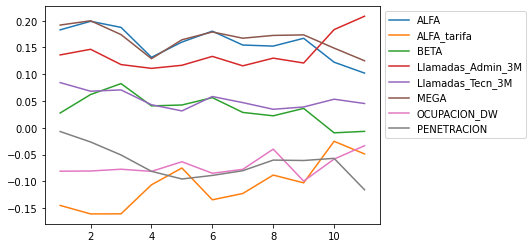

In [40]:
if conGraficos:
    ax = res_corr_total_raz_T.plot.line()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

### Analisis Específicos

In [41]:
#data=data_c0.merge(maestro_data, left_on=['COD_NODO'], right_on=['COD_NODO'], how='left')
data=data_c0.copy()

In [42]:
data.groupby('DIVISION')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False)

,CANT_USER
DIVISION,
REGION CENTRO,5511084
REGION OCCIDENTE,2378040
REGION NOROCCIDENTE,1985062
REGION ORIENTE,969847
REGION COSTA,428183


In [43]:
data.groupby('CIUDAD')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(6)

,CANT_USER
CIUDAD,
BOGOTA,5387124
CALI,1443961
MEDELLIN,1124616
PEREIRA,372451
BUCARAMANGA,338126
IBAGUE,305185


In [44]:
data[data['CIUDAD']=='BOGOTA'].groupby('AREA')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(10)

,CANT_USER
AREA,
BOGOTA NORTE,1478786
BOGOTA ORIENTE,1427870
BOGOTA SUR,1240343
BOGOTA OCCIDENTE,1240125


### Analisis regionales

In [45]:
regionales=data['DIVISION'].unique()
regionales = [x for x in regionales if pd.notnull(x)]
regionales

['REGION COSTA',
 'REGION ORIENTE',
 'REGION CENTRO',
 'REGION NOROCCIDENTE',
 'REGION OCCIDENTE']

In [46]:
dic_resultados={}

In [47]:
for reg in regionales:
    print(reg)
    dic_aux={}
    data_aux=data[data['DIVISION']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados[reg]=dic_aux

REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE


In [48]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in regionales:
    print(reg)
    #aux_tab_var=dic_resultados[reg]['total'][dic_resultados[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados[reg]['total'][dic_resultados[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg]
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
res_corr_total_raz_nacional

,variable_1,NACIONAL
1909,ALFA,0.158021
1958,ALFA_tarifa,-0.113852
2007,BETA,0.054865
2105,Llamadas_Admin_3M,0.079654
2154,Llamadas_Tecn_3M,0.019326
2203,MEGA,0.153120
2252,OCUPACION_DW,-0.071202
2301,PENETRACION,-0.066963


In [50]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]

In [51]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.158021,-0.113852,0.054865,0.079654,0.019326,0.15312,-0.071202,-0.066963
REGION COSTA,0.139332,-0.131364,0.064993,0.052672,0.040436,0.128191,-0.103941,-0.073132
REGION ORIENTE,0.139316,-0.056828,0.043238,0.186162,0.050221,0.134188,-0.043577,-0.116232
REGION CENTRO,0.145064,-0.17702,0.063073,0.033306,0.010921,0.12934,-0.079718,-0.06867
REGION NOROCCIDENTE,0.091993,-0.065213,0.027967,0.064751,0.022973,0.0915,-0.042292,-0.042657
REGION OCCIDENTE,0.20862,-0.039733,0.062443,0.142094,0.022746,0.210353,-0.067688,-0.11931


In [52]:
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.158021,-0.113852,0.054865,0.079654,0.019326,0.15312,-0.071202,-0.066963
REGION COSTA,0.139332,-0.131364,0.064993,0.052672,0.040436,0.128191,-0.103941,-0.073132
REGION ORIENTE,0.139316,-0.056828,0.043238,0.186162,0.050221,0.134188,-0.043577,-0.116232
REGION CENTRO,0.145064,-0.17702,0.063073,0.033306,0.010921,0.12934,-0.079718,-0.06867
REGION NOROCCIDENTE,0.091993,-0.065213,0.027967,0.064751,0.022973,0.0915,-0.042292,-0.042657
REGION OCCIDENTE,0.20862,-0.039733,0.062443,0.142094,0.022746,0.210353,-0.067688,-0.11931


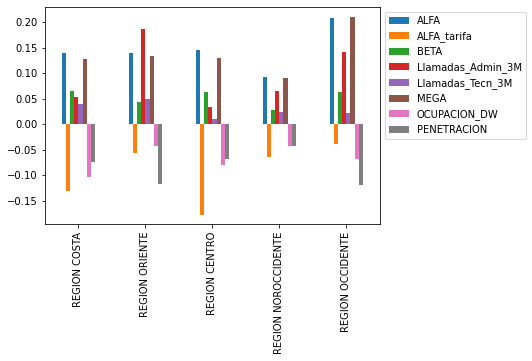

In [53]:
if conGraficos:
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(30,20));

### Analisis Temporal_ ESPECIFICO

In [54]:
## guardar en tabla
for reg in regionales:
    data_aux=data[data['DIVISION']==reg]    
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


2
3
4
5
6
7
8
9
10
11
1
2

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [55]:
DataSetEntregable_totales_temp['CATEGORIA']=DataSetEntregable_totales_temp['CATEGORIA'].fillna('NACIONAL')

In [56]:
DataSetEntregable_totales_temp

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION,CATEGORIA
1,0.182939,-0.145147,0.027591,0.136119,0.084383,0.19193,-0.081185,-0.007017,NACIONAL
2,0.198935,-0.161004,0.062106,0.146656,0.068285,0.199929,-0.0808,-0.026581,NACIONAL
3,0.187576,-0.160858,0.082516,0.118053,0.07069,0.174106,-0.07751,-0.050876,NACIONAL
4,0.131669,-0.106616,0.040856,0.110994,0.04302,0.129073,-0.081508,-0.081422,NACIONAL
5,0.160131,-0.075173,0.042542,0.116737,0.031457,0.16443,-0.063532,-0.095737,NACIONAL
...,...,...,...,...,...,...,...,...,...
7,0.166589,0.039153,0.010628,0.183343,0.047042,0.179422,-0.104516,-0.179846,REGION OCCIDENTE
8,0.281002,-0.085248,0.085343,0.214345,0.142543,0.298417,-0.073054,-0.109443,REGION OCCIDENTE
9,0.159732,-0.066095,0.033986,0.142633,0.025666,0.179014,-0.079308,-0.096567,REGION OCCIDENTE
10,0.162365,-0.032592,-0.019686,0.191985,0.021456,0.18535,-0.069714,-0.166407,REGION OCCIDENTE


## Ciudades

In [57]:
ciudades=data.groupby('CIUDAD')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(6).index
ciudades

Index(['BOGOTA', 'CALI', 'MEDELLIN', 'PEREIRA', 'BUCARAMANGA', 'IBAGUE'], dtype='object', name='CIUDAD')

In [58]:
dic_resultados_ciudad={}

In [59]:
for reg in ciudades:
    print(reg)
    dic_aux={}
    data_aux=data[data['CIUDAD']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados_ciudad[reg]=dic_aux

BOGOTA
CALI
MEDELLIN
PEREIRA
BUCARAMANGA
IBAGUE


In [60]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in ciudades:
    print(reg)
    #aux_tab_var=dic_resultados_ciudad[reg]['total'][dic_resultados_ciudad[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados_ciudad[reg]['total'][dic_resultados_ciudad[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg+'_r']
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

BOGOTA
CALI
MEDELLIN
PEREIRA
BUCARAMANGA
IBAGUE


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [61]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]

In [62]:
res_corr_total_raz_T

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.158021,-0.113852,0.054865,0.079654,0.019326,0.15312,-0.071202,-0.066963
BOGOTA,0.144126,-0.17673,0.06256,0.029262,0.009631,0.128845,-0.078626,-0.065132
CALI,0.237801,-0.082376,0.048152,0.101486,-0.019316,0.249298,-0.087979,-0.08512
MEDELLIN,0.12463,-0.075834,0.057815,0.085617,0.083276,0.108622,-0.094627,-0.131381
PEREIRA,0.008878,0.122289,-0.056281,0.05565,-0.08997,0.05799,0.092798,0.089645
BUCARAMANGA,0.056396,0.049136,0.038007,0.121422,0.020145,0.043134,0.032871,-0.000442
IBAGUE,0.073705,0.105366,0.002094,0.155086,-0.008311,0.095292,0.077589,-0.044556


In [63]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.158021,-0.113852,0.054865,0.079654,0.019326,0.15312,-0.071202,-0.066963
REGION COSTA,0.139332,-0.131364,0.064993,0.052672,0.040436,0.128191,-0.103941,-0.073132
REGION ORIENTE,0.139316,-0.056828,0.043238,0.186162,0.050221,0.134188,-0.043577,-0.116232
REGION CENTRO,0.145064,-0.17702,0.063073,0.033306,0.010921,0.12934,-0.079718,-0.06867
REGION NOROCCIDENTE,0.091993,-0.065213,0.027967,0.064751,0.022973,0.0915,-0.042292,-0.042657
REGION OCCIDENTE,0.20862,-0.039733,0.062443,0.142094,0.022746,0.210353,-0.067688,-0.11931
BOGOTA,0.144126,-0.17673,0.06256,0.029262,0.009631,0.128845,-0.078626,-0.065132
CALI,0.237801,-0.082376,0.048152,0.101486,-0.019316,0.249298,-0.087979,-0.08512
MEDELLIN,0.12463,-0.075834,0.057815,0.085617,0.083276,0.108622,-0.094627,-0.131381
PEREIRA,0.008878,0.122289,-0.056281,0.05565,-0.08997,0.05799,0.092798,0.089645


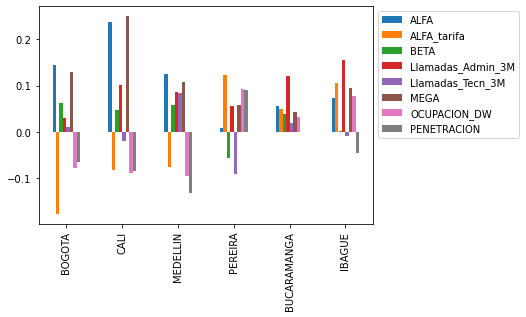

In [64]:
if conGraficos:
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot()

### Analisis temporal

In [65]:
## guardar en tabla
for reg in ciudades:
    data_aux=data[data['CIUDAD']==reg]      
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


2
3
4
5
6
7
8
9
10
11
1


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [66]:
DataSetEntregable_totales_temp

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION,CATEGORIA
1,0.182939,-0.145147,0.027591,0.136119,0.084383,0.19193,-0.081185,-0.007017,NACIONAL
2,0.198935,-0.161004,0.062106,0.146656,0.068285,0.199929,-0.0808,-0.026581,NACIONAL
3,0.187576,-0.160858,0.082516,0.118053,0.07069,0.174106,-0.07751,-0.050876,NACIONAL
4,0.131669,-0.106616,0.040856,0.110994,0.04302,0.129073,-0.081508,-0.081422,NACIONAL
5,0.160131,-0.075173,0.042542,0.116737,0.031457,0.16443,-0.063532,-0.095737,NACIONAL
...,...,...,...,...,...,...,...,...,...
7,-0.058559,0.218487,-0.224393,0.21324,0.010172,0.070819,0.026782,-0.119131,IBAGUE
8,0.165565,0.185303,0.073712,0.255256,0.131128,0.141086,0.088311,0.077497,IBAGUE
9,0.058126,0.089102,-0.10642,0.20208,0.013442,0.121521,0.239996,0.030627,IBAGUE
10,-0.052816,0.100021,-0.035678,0.305274,0.086672,-0.016394,-0.000089,-0.227319,IBAGUE


### Bogotá

In [67]:
sectoresBog=data[data['CIUDAD']=='BOGOTA']['AREA'].unique()

In [68]:
dic_resultados_Bogota={}

In [69]:
for reg in sectoresBog:
    print(reg)
    dic_aux={}
    data_aux=data[data['AREA']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados_Bogota[reg]=dic_aux

BOGOTA NORTE
BOGOTA ORIENTE
BOGOTA OCCIDENTE
BOGOTA SUR


In [70]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in sectoresBog:
    print(reg)
    #aux_tab_var=dic_resultados_Bogota[reg]['total'][dic_resultados_Bogota[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados_Bogota[reg]['total'][dic_resultados_Bogota[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg+'_r']
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

BOGOTA NORTE
BOGOTA ORIENTE
BOGOTA OCCIDENTE
BOGOTA SUR


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


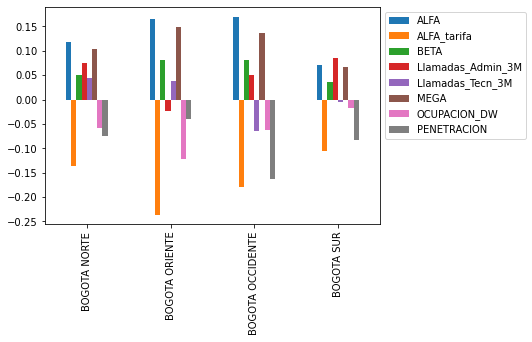

In [71]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]
if conGraficos:    
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot()

In [72]:
res_corr_total_raz_T[1:]

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
BOGOTA NORTE,0.118225,-0.137177,0.051301,0.07529,0.044476,0.103195,-0.058006,-0.074295
BOGOTA ORIENTE,0.165214,-0.235806,0.08087,-0.023522,0.037814,0.148716,-0.122389,-0.039901
BOGOTA OCCIDENTE,0.16961,-0.178975,0.081258,0.049599,-0.063527,0.136004,-0.062279,-0.162776
BOGOTA SUR,0.071771,-0.104629,0.035882,0.084814,-0.005246,0.065802,-0.017686,-0.08348


In [73]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.158021,-0.113852,0.054865,0.079654,0.019326,0.15312,-0.071202,-0.066963
REGION COSTA,0.139332,-0.131364,0.064993,0.052672,0.040436,0.128191,-0.103941,-0.073132
REGION ORIENTE,0.139316,-0.056828,0.043238,0.186162,0.050221,0.134188,-0.043577,-0.116232
REGION CENTRO,0.145064,-0.17702,0.063073,0.033306,0.010921,0.12934,-0.079718,-0.06867
REGION NOROCCIDENTE,0.091993,-0.065213,0.027967,0.064751,0.022973,0.0915,-0.042292,-0.042657
REGION OCCIDENTE,0.20862,-0.039733,0.062443,0.142094,0.022746,0.210353,-0.067688,-0.11931
BOGOTA,0.144126,-0.17673,0.06256,0.029262,0.009631,0.128845,-0.078626,-0.065132
CALI,0.237801,-0.082376,0.048152,0.101486,-0.019316,0.249298,-0.087979,-0.08512
MEDELLIN,0.12463,-0.075834,0.057815,0.085617,0.083276,0.108622,-0.094627,-0.131381
PEREIRA,0.008878,0.122289,-0.056281,0.05565,-0.08997,0.05799,0.092798,0.089645


### Resultado Atemporal

In [74]:
### Guardar Archivo
##DataSetEntregable_totales.to_csv('CorrelacionesAgrupadas_14Dic.csv',sep=';')

### Temporales

In [75]:
## guardar en tabla
for reg in sectoresBog:
    data_aux=data[data['AREA']==reg]      
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Resulado Temporal

In [76]:
#DataSetEntregable_totales_temp.to_csv('CorrelacionesTemporales_14Dic.csv',sep=';')

# Regresión multilineal

* Reescalado
* Modelos

In [77]:
DataSetEntregable_totales_reg=pd.DataFrame()
DataSetEntregable_totales_temp_reg=pd.DataFrame()

In [78]:
data_reg=data_c0.copy()

In [79]:
data_reg=data_reg[data_reg['FECHA']>=4]

In [80]:
sel_variables_causas2.remove('PENETRACION')
sel_variables_causas2

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'OCUPACION_DW']

In [81]:
data_reg.set_index('COD_NODO',inplace=True)

In [82]:
data_reg=data_reg[sel_variables_causas2+['ind_churn','FECHA']]

In [83]:
data_reg.isnull().sum()/len(data_reg)

ALFA_tarifa          0.0
ALFA                 0.0
BETA                 0.0
MEGA                 0.0
Llamadas_Admin_3M    0.0
Llamadas_Tecn_3M     0.0
OCUPACION_DW         0.0
ind_churn            0.0
FECHA                0.0
dtype: float64

In [84]:
data_reg=data_reg.dropna()

In [85]:
colums_reg=list(data_reg.columns)

In [86]:
colums_reg.remove('FECHA')

In [87]:
colums_reg

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'OCUPACION_DW',
 'ind_churn']

In [88]:
#for col in colums_reg:
#    data_reg[col]=np.log1p(data_reg[col])

In [89]:
## Escalar
#cols=data_reg.columns
scaler = MinMaxScaler()
data_reg[colums_reg]= scaler.fit_transform(data_reg[colums_reg])

In [90]:
colums_reg.remove('ind_churn')

In [91]:
colums_reg

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'OCUPACION_DW']

### Seleccion Variables Significativas

In [92]:
reg_nal=iter_regresion(data_reg)
reg_nal

1
      coefs        pvalues           Features    VIF
0 -0.019199   6.846730e-30        ALFA_tarifa   8.62
1  0.009446   5.819316e-02               ALFA  20.71
2  0.005751   1.337945e-01               BETA  13.02
3  0.027659   7.672080e-16               MEGA  16.98
4  0.051168  1.080921e-135  Llamadas_Admin_3M  10.56
5 -0.028914   4.451527e-38   Llamadas_Tecn_3M   7.98
6 -0.022318   9.526912e-43       OCUPACION_DW  10.99
      coefs   pvalues Features    VIF
2  0.005751  0.133795     BETA  13.02
2
      coefs        pvalues           Features    VIF
0 -0.019259   4.441610e-30        ALFA_tarifa   7.43
1  0.015845   8.092610e-10               ALFA   6.44
2  0.023593   3.120624e-29               MEGA   8.72
3  0.051120  1.801618e-135  Llamadas_Admin_3M  10.53
4 -0.028932   4.008005e-38   Llamadas_Tecn_3M   7.67
5 -0.022469   1.839896e-43       OCUPACION_DW  10.18
      coefs       pvalues Features   VIF
1  0.015845  8.092610e-10     ALFA  6.44


,coefs,pvalues,Features,VIF
0,-0.019259,4.441610e-30,ALFA_tarifa,7.43
1,0.015845,8.092610e-10,ALFA,6.44
2,0.023593,3.120624e-29,MEGA,8.72
3,0.051120,1.801618e-135,Llamadas_Admin_3M,10.53
4,-0.028932,4.008005e-38,Llamadas_Tecn_3M,7.67
5,-0.022469,1.839896e-43,OCUPACION_DW,10.18


In [93]:
colums_reg=list(reg_nal['Features'])
colums_reg

['ALFA_tarifa',
 'ALFA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'OCUPACION_DW']

### Nacional

In [94]:
# Dividir en X y X
y_train = data_reg['ind_churn']
X_train =  data_reg[colums_reg]

In [95]:
#Modelos
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ind_churn   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     267.2
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:23:30   Log-Likelihood:                 50489.
No. Observations:               29760   AIC:                        -1.010e+05
Df Residuals:                   29753   BIC:                        -1.009e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0709      0.002     46.912      0.000       0.068       0.074
ALFA_tarifa          -0.0193      0.002    -11.407      0.000      -0.023      -0.016
ALFA                  0.0158      0.003      6.145      0.000       0.011       0.021
MEGA                  0.0236      0.002     11.236      0.000       0.019       0.028
Llamadas_Admin_3M     0.0511      0.002     24.900      0.000       0.047       0.055
Llamadas_Tecn_3M     -0.0289      0.002    -12.927      0.000      -0.033      -0.025
OCUPACION_DW         -0.0225      0.002    -13.846      0.000      -0.026      -0.019
==============================================================================
Omnibus:                    15696.660   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           369772.210
Skew:                           2.042   Prob(JB):                         0.00
Kurtosis:                      19.779   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Llamadas_Admin_3M,10.53
5,OCUPACION_DW,10.18
2,MEGA,8.72
4,Llamadas_Tecn_3M,7.67
0,ALFA_tarifa,7.43
1,ALFA,6.44


In [97]:
df_coef_nal=lr_1.params.to_frame()
df_coef_nal.columns=['coefs']

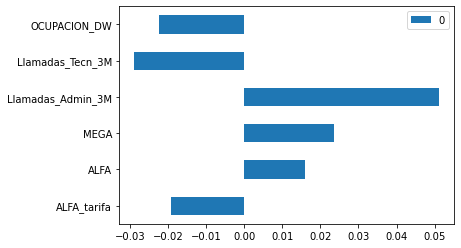

In [98]:
if conGraficos:
    lr_1.params.to_frame()[1:].plot.barh()

In [99]:
df_coef_nal

,coefs
const,0.070941
ALFA_tarifa,-0.019259
ALFA,0.015845
MEGA,0.023593
Llamadas_Admin_3M,0.051120
Llamadas_Tecn_3M,-0.028932
OCUPACION_DW,-0.022469


In [100]:
df_vif_nal=vif

In [101]:
DataSetEntregable_totales_reg=df_coef_nal.copy()

In [102]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg[1:].T
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,OCUPACION_DW
coefs,-0.019259,0.015845,0.023593,0.05112,-0.028932,-0.022469


In [103]:
DataSetEntregable_totales_reg['index']='NACIONAL'
DataSetEntregable_totales_reg.set_index('index',inplace=True)
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,OCUPACION_DW
index,,,,,,
NACIONAL,-0.019259,0.015845,0.023593,0.05112,-0.028932,-0.022469


## Regresión en el tiempo

In [104]:
data_reg

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,OCUPACION_DW,ind_churn,FECHA
COD_NODO,,,,,,,,,
RO4,0.471589,0.270868,0.262215,0.409814,0.355105,0.388447,0.699387,0.021177,7
KRI,0.607833,0.156601,0.298927,0.210554,0.300533,0.181737,0.359557,0.045029,7
GIA,0.487542,0.037083,0.267557,0.055167,0.483996,0.241001,0.397254,0.054149,7
CLD,0.473778,0.165939,0.204135,0.313230,0.380845,0.242209,0.587460,0.055971,11
SH31,0.490136,0.228723,0.332667,0.278934,0.378560,0.142346,0.517957,0.134885,9
...,...,...,...,...,...,...,...,...,...
CS21,0.266219,0.285820,0.167077,0.640440,0.320040,0.218219,0.696087,0.078411,7
S04,0.502347,0.443881,0.323249,0.555722,0.393165,0.226038,0.336555,0.087600,11
472D,0.455809,0.260804,0.149482,0.641460,0.368423,0.373531,0.440992,0.065476,4


In [105]:
(df_coef, df_vif)=dic_reg_mes_ind(data_reg)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


ValueError: zero-size array to reduction operation maximum which has no identity

In [106]:
df_coef

NameError: name 'df_coef' is not defined

In [107]:
df_coef_T=df_coef.T
df_coef_T.pop('const')
df_coef_T=df_coef_T[1:]
df_coef_T

NameError: name 'df_coef' is not defined

In [108]:
DataSetEntregable_totales_temp_reg=df_coef_T.copy()

NameError: name 'df_coef_T' is not defined

In [109]:
if conGraficos:
    ax = df_coef_T.plot.line()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

NameError: name 'df_coef_T' is not defined

## Analisis Específicos

In [110]:
data_reg

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,OCUPACION_DW,ind_churn,FECHA
COD_NODO,,,,,,,,,
RO4,0.471589,0.270868,0.262215,0.409814,0.355105,0.388447,0.699387,0.021177,7
KRI,0.607833,0.156601,0.298927,0.210554,0.300533,0.181737,0.359557,0.045029,7
GIA,0.487542,0.037083,0.267557,0.055167,0.483996,0.241001,0.397254,0.054149,7
CLD,0.473778,0.165939,0.204135,0.313230,0.380845,0.242209,0.587460,0.055971,11
SH31,0.490136,0.228723,0.332667,0.278934,0.378560,0.142346,0.517957,0.134885,9
...,...,...,...,...,...,...,...,...,...
CS21,0.266219,0.285820,0.167077,0.640440,0.320040,0.218219,0.696087,0.078411,7
S04,0.502347,0.443881,0.323249,0.555722,0.393165,0.226038,0.336555,0.087600,11
472D,0.455809,0.260804,0.149482,0.641460,0.368423,0.373531,0.440992,0.065476,4


In [111]:
data_reg_nor=data_reg.copy()

In [112]:
data_reg_nor=data_reg_nor.merge(maestro_data, left_index=True, right_on=['COD_NODO'], how='left')
data_reg_nor.set_index('COD_NODO', inplace=True)

In [113]:
data_reg_nor_temp=data_reg_nor.copy()

In [114]:
data_reg_nor.pop('FECHA')

COD_NODO
RO4      7
KRI      7
GIA      7
CLD     11
SH31     9
        ..
CS21     7
S04     11
472D     4
ACB     11
E3Z      5
Name: FECHA, Length: 30944, dtype: int64

## Regional

In [115]:
dic_resultados_reg={}

In [116]:
for reg in regionales:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['DIVISION']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    y_train = data_aux.pop('ind_churn')
    X_train = data_aux[colums_reg]    
    #Modelos
    X_train_lm = sm.add_constant(X_train)
    lr_1 = sm.OLS(y_train, X_train_lm).fit()    
    dic_aux['coef']=lr_1.params.to_frame()
    dic_aux['coef'].columns=['coefs']
    # Cálculo VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    dic_aux['vif']=vif
    dic_resultados[reg]=dic_aux

REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE


In [117]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in regionales:
    print(reg)
    
    aux_tab_coef=dic_resultados[reg]['coef']
    aux_tab_vif=dic_resultados[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE


In [118]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])

In [119]:
df_coef_T

,ALFA_tarifa,ALFA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,OCUPACION_DW
coefs,-0.019259,0.015845,0.023593,0.051120,-0.028932,-0.022469
REGION COSTA,-0.027226,0.007942,0.011791,0.038905,-0.008698,-0.036274
REGION ORIENTE,-0.019223,0.009249,0.015816,0.094012,-0.032047,-0.012585
REGION CENTRO,-0.049705,0.018209,0.010479,0.052552,-0.030392,-0.022493
REGION NOROCCIDENTE,-0.016473,0.024219,0.036107,0.048611,-0.008546,-0.021451
REGION OCCIDENTE,-0.000112,0.020557,0.042669,0.112054,-0.040768,-0.024528


In [120]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,OCUPACION_DW
NACIONAL,-0.019259,0.015845,0.023593,0.051120,-0.028932,-0.022469
REGION COSTA,-0.027226,0.007942,0.011791,0.038905,-0.008698,-0.036274
REGION ORIENTE,-0.019223,0.009249,0.015816,0.094012,-0.032047,-0.012585
REGION CENTRO,-0.049705,0.018209,0.010479,0.052552,-0.030392,-0.022493
REGION NOROCCIDENTE,-0.016473,0.024219,0.036107,0.048611,-0.008546,-0.021451
REGION OCCIDENTE,-0.000112,0.020557,0.042669,0.112054,-0.040768,-0.024528


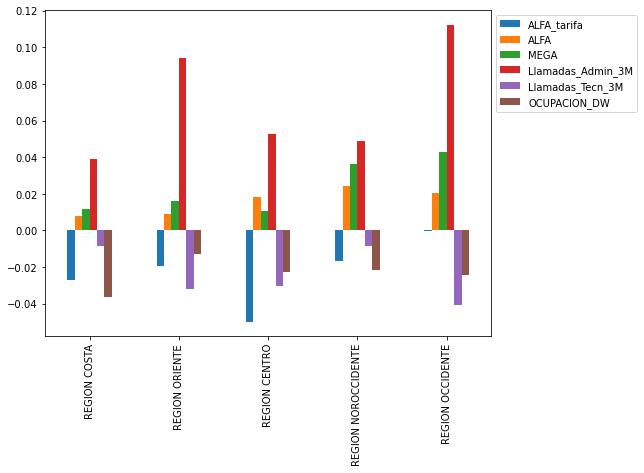

In [121]:
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

####  Analisis temporal

In [122]:
for reg in regionales:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['DIVISION']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)    

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
DataSetEntregable_totales_temp_reg['CATEGORIA']=DataSetEntregable_totales_temp_reg['CATEGORIA'].fillna('NACIONAL')

In [123]:
DataSetEntregable_totales_temp_reg

""


## Ciudades

In [124]:
dic_resultados_ciudad_reg={}
for reg in ciudades:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['CIUDAD']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    if len(data_aux)>0:
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]   

        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados_ciudad_reg[reg]=dic_aux

BOGOTA
CALI
MEDELLIN
PEREIRA
BUCARAMANGA
IBAGUE


In [125]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in dic_resultados_ciudad_reg:
    print(reg)    
    aux_tab_coef=dic_resultados_ciudad_reg[reg]['coef']
    aux_tab_vif=dic_resultados_ciudad_reg[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

BOGOTA
CALI
MEDELLIN
PEREIRA
BUCARAMANGA
IBAGUE


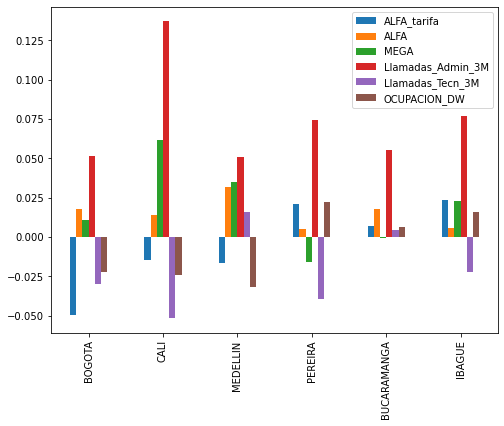

In [126]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

In [127]:
df_coef_T[1:]

,ALFA_tarifa,ALFA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,OCUPACION_DW
BOGOTA,-0.049733,0.017622,0.010960,0.051670,-0.030013,-0.022162
CALI,-0.014833,0.014133,0.061404,0.136946,-0.051554,-0.024007
MEDELLIN,-0.016879,0.031487,0.034617,0.051087,0.015531,-0.032149
PEREIRA,0.020949,0.005282,-0.016205,0.074160,-0.039365,0.021986
BUCARAMANGA,0.007198,0.017470,-0.000515,0.055245,0.004539,0.006231
IBAGUE,0.023398,0.005639,0.022984,0.076685,-0.022107,0.015970


In [128]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,OCUPACION_DW
NACIONAL,-0.019259,0.015845,0.023593,0.051120,-0.028932,-0.022469
REGION COSTA,-0.027226,0.007942,0.011791,0.038905,-0.008698,-0.036274
REGION ORIENTE,-0.019223,0.009249,0.015816,0.094012,-0.032047,-0.012585
REGION CENTRO,-0.049705,0.018209,0.010479,0.052552,-0.030392,-0.022493
REGION NOROCCIDENTE,-0.016473,0.024219,0.036107,0.048611,-0.008546,-0.021451
REGION OCCIDENTE,-0.000112,0.020557,0.042669,0.112054,-0.040768,-0.024528
BOGOTA,-0.049733,0.017622,0.010960,0.051670,-0.030013,-0.022162
CALI,-0.014833,0.014133,0.061404,0.136946,-0.051554,-0.024007
MEDELLIN,-0.016879,0.031487,0.034617,0.051087,0.015531,-0.032149
PEREIRA,0.020949,0.005282,-0.016205,0.074160,-0.039365,0.021986


#### Analisis temporal

In [129]:
for reg in ciudades:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['CIUDAD']==reg]
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


ValueError: zero-size array to reduction operation maximum which has no identity

In [130]:
DataSetEntregable_totales_temp_reg

""


## Bogota

In [131]:
dic_resultados_Bogota={}
for reg in sectoresBog:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['AREA']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    if len(data_aux)>0:
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]   

        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados_Bogota[reg]=dic_aux

BOGOTA NORTE
BOGOTA ORIENTE
BOGOTA OCCIDENTE
BOGOTA SUR


In [132]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in dic_resultados_Bogota:
    print(reg)    
    aux_tab_coef=dic_resultados_Bogota[reg]['coef']
    aux_tab_vif=dic_resultados_Bogota[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

BOGOTA NORTE
BOGOTA ORIENTE
BOGOTA OCCIDENTE
BOGOTA SUR


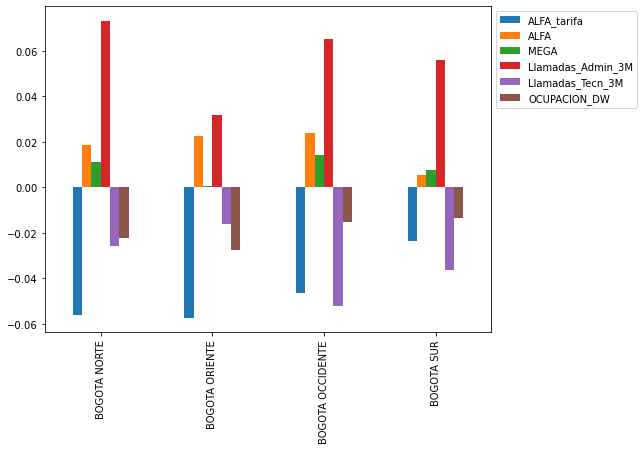

In [133]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

In [134]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,OCUPACION_DW
NACIONAL,-0.019259,0.015845,0.023593,0.051120,-0.028932,-0.022469
REGION COSTA,-0.027226,0.007942,0.011791,0.038905,-0.008698,-0.036274
REGION ORIENTE,-0.019223,0.009249,0.015816,0.094012,-0.032047,-0.012585
REGION CENTRO,-0.049705,0.018209,0.010479,0.052552,-0.030392,-0.022493
REGION NOROCCIDENTE,-0.016473,0.024219,0.036107,0.048611,-0.008546,-0.021451
REGION OCCIDENTE,-0.000112,0.020557,0.042669,0.112054,-0.040768,-0.024528
BOGOTA,-0.049733,0.017622,0.010960,0.051670,-0.030013,-0.022162
CALI,-0.014833,0.014133,0.061404,0.136946,-0.051554,-0.024007
MEDELLIN,-0.016879,0.031487,0.034617,0.051087,0.015531,-0.032149
PEREIRA,0.020949,0.005282,-0.016205,0.074160,-0.039365,0.021986


### Analisis Temporal

In [135]:
for reg in sectoresBog:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['AREA']==reg]
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


ValueError: zero-size array to reduction operation maximum which has no identity

In [136]:
DataSetEntregable_totales_temp_reg

""


In [137]:
### Guardar Archivo

In [138]:
#DataSetEntregable_totales_reg.to_csv('RegresionesAgrupadas_14Dic.csv',sep=';')

In [139]:
#DataSetEntregable_totales_temp_reg.to_csv('RegresionesTemporales_14Dic.csv',sep=';')

## Nodos Bogota

In [140]:
NodosBog=data[data['CIUDAD']=='BOGOTA']['COD_NODO'].unique()

In [141]:
len(NodosBog)

1799

In [142]:
data_reg_nor

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,OCUPACION_DW,ind_churn,DIVISION,AREA,ZONA,CIUDAD,DISTRITO
COD_NODO,,,,,,,,,,,,,
RO4,0.471589,0.270868,0.262215,0.409814,0.355105,0.388447,0.699387,0.021177,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3
KRI,0.607833,0.156601,0.298927,0.210554,0.300533,0.181737,0.359557,0.045029,REGION ORIENTE,CUNMENAL,META,VILLAVICENCIO,VILLAVICENCIO NORTE
GIA,0.487542,0.037083,0.267557,0.055167,0.483996,0.241001,0.397254,0.054149,REGION CENTRO,BOGOTA ORIENTE,USME,BOGOTA,LA VICTORIA
CLD,0.473778,0.165939,0.204135,0.313230,0.380845,0.242209,0.587460,0.055971,REGION CENTRO,BOGOTA OCCIDENTE,PORVENIR,BOGOTA,PATIO BONITO
SH31,0.490136,0.228723,0.332667,0.278934,0.378560,0.142346,0.517957,0.134885,REGION CENTRO,BOGOTA OCCIDENTE,ESTRADA,BOGOTA,VILLA LUZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS21,0.266219,0.285820,0.167077,0.640440,0.320040,0.218219,0.696087,0.078411,REGION CENTRO,BOGOTA ORIENTE,RESTREPO,BOGOTA,LA FRAGUA
S04,0.502347,0.443881,0.323249,0.555722,0.393165,0.226038,0.336555,0.087600,REGION CENTRO,BOGOTA NORTE,MAZUREN,BOGOTA,SUBA RINCON
472D,0.455809,0.260804,0.149482,0.641460,0.368423,0.373531,0.440992,0.065476,REGION CENTRO,BOGOTA SUR,ALSACIA,BOGOTA,HAYUELOS


In [143]:
data_reg_nor[data_reg_nor.index=='RO4']

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,OCUPACION_DW,ind_churn,DIVISION,AREA,ZONA,CIUDAD,DISTRITO
COD_NODO,,,,,,,,,,,,,
RO4,0.471589,0.270868,0.262215,0.409814,0.355105,0.388447,0.699387,0.021177,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3
RO4,0.367180,0.320447,0.153642,0.770304,0.503064,0.406146,0.973299,0.062602,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3
RO4,0.171826,0.437028,0.230170,0.742364,0.191121,0.224553,0.591231,0.060535,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3
RO4,0.478908,0.506823,0.311682,0.655957,0.453869,0.404702,0.912491,0.020666,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3
RO4,0.377212,0.405718,0.236698,0.672362,0.186795,0.236233,0.580330,0.020178,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3
RO4,0.497981,0.506422,0.323507,0.633554,0.311694,0.325123,0.681572,0.041132,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3
RO4,0.477517,0.341011,0.270972,0.500937,0.476434,0.477756,0.800278,0.042146,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3
RO4,0.244056,0.461715,0.216437,0.827864,0.246153,0.235221,0.564708,0.084708,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3


In [144]:
dic_resultados_NodosBogota={}
for reg in NodosBog:
    print(reg)
    dic_aux={}    
    #data_aux=data_reg_nor[data_reg_nor['COD_NODO']==reg] 
    data_aux=data_reg_nor[data_reg_nor.index==reg]
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    if len(data_aux)>0:
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]   

        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados_NodosBogota[reg]=dic_aux

5B6022
GIA
CLD
SH31
PIO4
5C7014
ST3
G4V
CZP
PRZ
13A1
GO2
AF1
BIN
56B4D
SD3
COL
50B4D
8A4011
SF41
PBL
3VU
UL2
39F3D
NMR
VER23B
G3A
7UT
ASU3
QUT
CEE
MS2
GVO
SLT
AL34
TB52D
VAL
EDC
57013M
I2S2D
JQO
BJ2
DRE
5AL014
5A2012
KH2
1EN
TAY
GA2
TCH1
54F3D
52G
12C
6DD
GA5
LAD13D
NNT
MHC
P1E
CT4
3802
4B4013
NVV
Z3C
9AA2D
15B
GGR
40D3D
50B23D
48A
LAG
JS5
CT3
P2E1
CAH
8C5011
MIL
CUI1
OIR
2C7021
KH21
4A8013
2RU
LTZ4D
35A4D
2B3032
9AA3
BSD
TC6
37B1
61014D
SEU
GA12
5001
4HB
JS3
7BZ
T5Y
4B0012
AF22
8A22
5B0022
5AL012
MDR1
IAI
MON2
COS2
VN2
5AM011
LM21
ROI
DVI11M
5AM023
TOZ
AL324D
SH1
3EP2
REL1
51E
9AI
FOR
HKD
BCH1
QR1
4B8011
BED
JIO
5C4011
UG2
BYR
ZI3
12B4D
TB44D
5B7023
1BQ1
B1G
BAL1
CRI4D
FBE
FB1
BLU
4A5011
CBE1
50B3D
5B4013
ABM
41C4
3AE013
F2R
SC32D
2F0013
1BC022
SON12D
S043D
VD12D
S202D
KM3
8AB014
9A51
BCH
S044D
G7C
16B2D
PON2
8B5012
ISA14D
2C0013
54C
SRA
SAT2
ALQ
SS3
SUB
CBE32D
KH11
T8Y
TMO
3A1012
4B14D
0BZ
CD12
4405
15013D
39H
BMM
4402
2B3023
ZI4
JDI
6HB
2C92D
TB8
ZI1
HSS
2B7014
4D0012
SON13D
53D1
4D

2C6052
44A
6902
HCV
GL1
9BZ
MSE
3501
2CA
1VV
MBX
TB5
5A7022
TBN
OLR1
39B
CL1
2B3014
5AE023
7903
FA1
53C2D
2B2013
NZ14D
ABA
ORR
56A
3704
VUR
LCR1
2B5024
SS6
114D
FC43D
56B
LGU
LOB2D
QSR1
GN3
I1T
UB6
4C0021
LGC
BLR
SG14D
VD24D
5AN011
AGS
8D52D
564D
5AM021
VN1
VG242D
724D
52E
SER
MSS
R2J
EPC
PDI1
AS41
G3V
ST24D
PN1
GA41
7704
8AD
MDR2
F1T
12B1
15C
TDN
B2H
4B4012
UY3
LRO2D
AL13A
1RM1
6VU
51012M
8C9011
PVC2D
CT1
5A6011
LCF
AAI
NZ13D
PBN4D
PVS
BND
2C8032
SSO
300013
VNL
2TF
S032D
MD11
45B
SUM2D
BG112D
40E4D
MSA
BLT
QR13D
5A5032
UA1
LEU
UNR
U1A
5C9012
VOS
7902
13A2
A4U
SA2
A5U4D
R3U
A2U
OKC
52D4D
AEQ
4B2014
FV2
GUN
9A1
4B2011
39A4D
1EM
PEP2D
TPV
ZT1
TZ12
67011
BLS
CO3
5B2013
CD1
PV2
OLS
9A84D
CG11
2SV
2B3024
I1O
BSR
4B7011
ORL
STS
BSC12D
PIM
IFN
2C7013
PN13B
ZH22
51A
MD22
QOS
B2H2
EXT1
EOI
SVC
ST32D
AS2
52J
VDY
8BZ
LF8
1RA1
TOM
LF4
G2V
44A1
NEM3D
VG244D
GO1
S034D
FC3
BZ1
1B6024
0CP
GUL4D
LSM4D
AFA
1301
ADO
9A3D
CD11
BZA1
9AA3D
LF32D
31A024
CMZ
1BC023


In [145]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in dic_resultados_NodosBogota:
    print(reg)    
    aux_tab_coef=dic_resultados_NodosBogota[reg]['coef']
    aux_tab_vif=dic_resultados_NodosBogota[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

5B6022
GIA
CLD
SH31
PIO4
5C7014
ST3
G4V
CZP
PRZ
13A1
GO2
AF1
BIN
56B4D
SD3
COL
50B4D
8A4011
SF41
PBL
3VU
UL2
39F3D
NMR
VER23B
G3A
7UT
ASU3
QUT
CEE
MS2
GVO
SLT
AL34
TB52D
VAL
EDC
57013M
I2S2D
JQO
BJ2
DRE
5AL014
5A2012
KH2
1EN
TAY
GA2
TCH1
54F3D
52G
12C
6DD
GA5
LAD13D
NNT
MHC
P1E
CT4
3802
4B4013
NVV
Z3C
9AA2D
15B
GGR
40D3D
50B23D
48A
LAG
JS5
CT3
P2E1
CAH
8C5011
MIL
CUI1
OIR
2C7021
KH21
4A8013
2RU
LTZ4D
35A4D
2B3032
9AA3
BSD
TC6
37B1
61014D
SEU
GA12
5001
4HB
JS3
7BZ
T5Y
4B0012
AF22
8A22
5B0022
5AL012
MDR1
IAI
MON2
COS2
VN2
5AM011
LM21
ROI
DVI11M
5AM023
TOZ
AL324D
SH1
3EP2
REL1
51E
9AI
FOR
HKD
BCH1
QR1
4B8011
BED
JIO
5C4011
UG2
BYR
ZI3
12B4D
TB44D
5B7023
1BQ1
B1G
BAL1
CRI4D
FBE
FB1
BLU
4A5011
CBE1
50B3D
5B4013
ABM
41C4
3AE013
F2R
SC32D
2F0013
1BC022
SON12D
S043D
VD12D
S202D
KM3
8AB014
9A51
BCH
S044D
G7C
16B2D
PON2
8B5012
ISA14D
2C0013
54C
SRA
SAT2
ALQ
SS3
SUB
CBE32D
KH11
T8Y
TMO
3A1012
4B14D
0BZ
CD12
4405
15013D
39H
BMM
4402
2B3023
ZI4
JDI
6HB
2C92D
TB8
ZI1
HSS
2B7014
4D0012
SON13D
53D1
4D

SJA4D
5A0021
2C6052
44A
6902
HCV
GL1
9BZ
MSE
3501
2CA
1VV
MBX
TB5
5A7022
TBN
OLR1
39B
CL1
2B3014
5AE023
7903
FA1
53C2D
2B2013
NZ14D
ABA
ORR
56A
3704
VUR
LCR1
2B5024
SS6
114D
FC43D
56B
LGU
LOB2D
QSR1
GN3
I1T
UB6
4C0021
LGC
BLR
SG14D
VD24D
5AN011
AGS
8D52D
564D
5AM021
VN1
VG242D
724D
52E
SER
MSS
R2J
EPC
PDI1
AS41
G3V
ST24D
PN1
GA41
7704
8AD
MDR2
F1T
12B1
15C
TDN
B2H
4B4012
UY3
LRO2D
AL13A
1RM1
6VU
51012M
8C9011
PVC2D
CT1
5A6011
LCF
AAI
NZ13D
PBN4D
PVS
BND
2C8032
SSO
300013
VNL
2TF
S032D
MD11
45B
SUM2D
BG112D
40E4D
MSA
BLT
QR13D
5A5032
UA1
LEU
UNR
U1A
5C9012
VOS
7902
13A2
A4U
SA2
A5U4D
R3U
A2U
OKC
52D4D
AEQ
4B2014
FV2
GUN
9A1
4B2011
39A4D
1EM
PEP2D
TPV
ZT1
TZ12
67011
BLS
CO3
5B2013
CD1
PV2
OLS
9A84D
CG11
2SV
2B3024
I1O
BSR
4B7011
ORL
STS
BSC12D
PIM
IFN
2C7013
PN13B
ZH22
51A
MD22
QOS
B2H2
EXT1
EOI
SVC
ST32D
AS2
52J
VDY
8BZ
LF8
1RA1
TOM
LF4
G2V
44A1
NEM3D
VG244D
GO1
S034D
FC3
BZ1
1B6024
0CP
GUL4D
LSM4D
AFA
1301
ADO
9A3D
CD11
BZA1
9AA3D
LF32D
31A024
CMZ
1BC023


In [146]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])
df_coef_T[1:]

,ALFA_tarifa,ALFA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,OCUPACION_DW
5B6022,0.280943,-0.385774,0.015655,0.037496,-0.490821,0.033574
GIA,-0.470688,1.692573,-1.571395,0.119127,-2.163529,-1.687959
CLD,-0.006863,-0.496038,0.152456,0.530231,-0.881824,-0.149336
SH31,0.645646,0.148757,-0.452134,1.702218,-4.441876,6.243549
PIO4,-2.801098,-3.937362,4.370599,13.259669,0.381906,-32.983353
...,...,...,...,...,...,...
9AA3D,-0.224045,0.002512,-0.997570,-0.269524,-0.434502,-0.046885
LF32D,-0.192892,1.606156,-0.427255,-0.730278,1.084581,6.506091
31A024,0.222585,0.786905,-0.513050,0.022847,0.294487,-0.165587
CMZ,-1.530252,-77.778184,41.253483,-7.428964,7.704416,-0.324629


In [147]:
df_coef_T[1:].to_csv('reg_nodos_Bogota_11M_sinP.csv',sep=';')

## Resultados

In [148]:
DataSetEntregable_totales
DataSetEntregable_totales_temp
DataSetEntregable_totales_reg
DataSetEntregable_totales_temp_reg

""
